<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80VS_KNN%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀VS KNN회귀

In [4]:
import numpy as np
n=1000
heights = np.random.normal(172,8,n)

In [10]:
heights2 =[height//5 for height in heights]
import pandas as pd
se = pd.Series(heights2)
svc= se.value_counts()

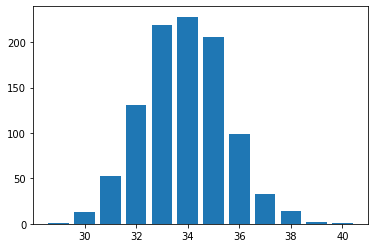

In [11]:
import matplotlib.pyplot as plt
plt.bar(svc.index,svc.values)
plt.show()

In [13]:
bmi = np.random.normal(21,1,n)
weights = bmi*(heights**2)/10000 #bmi = w/(txt), t의 단위는 m

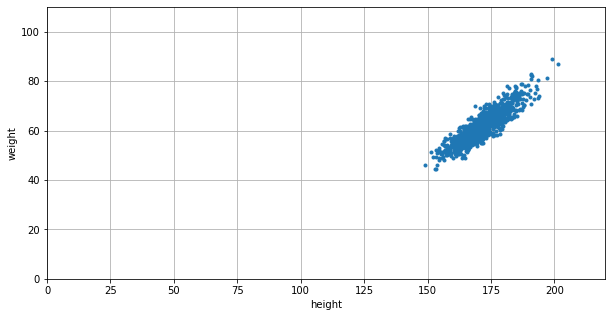

In [19]:
plt.figure(figsize=(10,5))
plt.plot(heights,weights,'.')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0,220)
plt.ylim(0,110)
plt.grid(True)
plt.show()

In [34]:
#xs = [[weight] for weight in weights]
xs =weights.reshape(-1,1) #독립변수는 여러 특성으로 구성할 수 있어서 ML 모델에서는 2차원 배열 형태로 학습 데이터를 입력받음
xs.shape

(1000, 1)

In [35]:
ys = heights #종속변수는 한개이며 ML모델에서 1차원 배열 형태로 학습 데이터를 입력받음
ys.shape

(1000,)

In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() #모델 개체 생성
lr_model.fit(xs,ys) #학습
lr_model.coef_, lr_model.intercept_ #가중치, 편향

(array([1.09469384]), 103.84516404914123)

In [27]:
txs = np.array([[50],[60],[67],[70],[94]])

In [28]:
pred_val1 = lr_model.predict(txs) #예측하시오.
pred_val1

array([158.57985622, 169.52679465, 177.18965156, 180.47373309,
       206.74638533])

In [39]:
from sklearn.model_selection import train_test_split
train_xs,test_xs,train_ys,test_ys = train_test_split(xs,ys,train_size=0.8)
train_xs.shape, test_xs.shape,train_ys.shape,test_ys.shape

((800, 1), (200, 1), (800,), (200,))

In [40]:
lr_model = LinearRegression() #모델 개체 생성
lr_model.fit(xs,ys)
train_score = lr_model.score(train_xs,train_ys) #평가하시오.
test_score = lr_model.score(test_xs,test_ys) #평가하시오.
train_score,test_score

(0.7896401634807699, 0.8101422823048724)

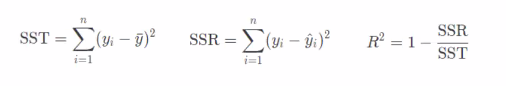

SSR에 사용한 값은 평균과 예측값

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor() # 모델 개체 생성
knr_model.fit(xs,ys) #학습
pred_val2 =knr_model.predict(txs) #예측하시오.
pred_val2

array([160.57199274, 167.6723863 , 177.06912016, 178.08036612,
       194.55344896])

In [54]:
lr_model = LinearRegression() #모델 개체 생성
lr_model.fit(xs,ys) #학습
train_score = lr_model.score(train_xs,train_ys) #평가하시오.
test_score = lr_model.score(test_xs,test_ys) #평가하시오.
train_score,test_score

(0.7896401634807699, 0.8101422823048724)

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor() #모델 개체 생성
knr_model.fit(xs, ys) #학습
train_score = knr_model.score(train_xs,train_ys) #평가하시오.
test_score = knr_model.score(test_xs,test_ys) #평가하시오.
train_score, test_score

(0.8330935765070254, 0.8500390734288845)

Knn에서 주의할 점

In [56]:
pv1 = lr_model.predict([[35],[82],[85],[90],[100],[108],[120],[130]])
pv2 = knr_model.predict([[35],[82],[85],[90],[100],[108],[120],[130]])
pv1,pv2

(array([142.15944857, 193.61005921, 196.89414074, 202.36760996,
        213.31454839, 222.07209914, 235.20842526, 246.15536369]),
 array([152.69924923, 192.05449821, 194.15713206, 194.55344896,
        194.55344896, 194.55344896, 194.55344896, 194.55344896]))

In [48]:
weights.max()

88.91137884162033

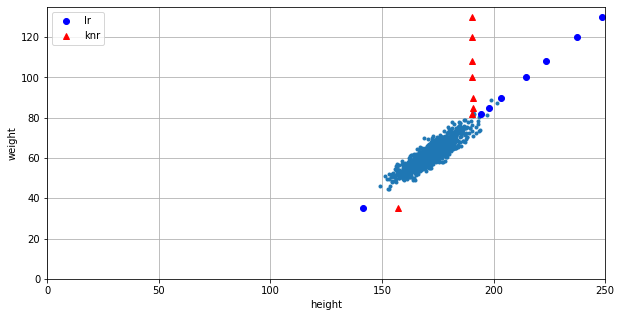

In [57]:
plt.figure(figsize=(10,5))
plt.plot(heights,weights,'.')
plt.plot([141.54,194.43,197.81,203.44,214.69,223.69,237.20,248.45],[35,82,85,90,100,108,120,130],'bo',label='lr')
plt.plot([157.05,190.43,190.83,190.83,190.38,190.38,190.38,190.38],[35,82,85,90,100,108,120,130],'r^',label='knr')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0,250)
plt.ylim(0,135)
plt.grid(True)
plt.legend()
plt.show()